### Overview
The primary objective of this project is to analyze the factors contributing to the reported decline in sales for SalesEase, an online retailer, and provide insights to reverse this trend. 


**The Issue: Declining Sales**
- Six months of continuous decline in sales reported by the SalesEase management.
- Concerns about the sustainability of the business.
- Need to understand underlying factors affecting sales performance.


**Solution: Conduct Exploratory Data Analysis (EDA) to uncover insights**

The key areas of focus include identifying product categories' performance, understanding customer behavior, evaluating sales channels' effectiveness, and optimizing various aspects of the e-commerce operation.

### Project Steps
1. Data Exploration
2. Time Series Analysis
3. Customer Segmentation Analysis
4. Product Analysis
5. Payment and Returns Analysis
6. Insights and Recommendations

## 1. Loading, inspecting and validating the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../data/ShopEase.csv')
df.shape

(1000, 12)

In [8]:
df.head()

,OrderID,ProductID,Category,ProductName,Quantity,Price,TotalAmount,OrderDate,CustomerID,PaymentMethod,SalesChannel,IsReturned
0,1,272,Electronics,Product_272,3,54.21,162.63,2022-04-21 01:48:37,26,Credit Card,In-Store,1
1,2,147,Electronics,Product_147,3,163.68,491.04,2022-02-26 03:09:32,38,Cash,Website,1
2,3,217,Fashion,Product_217,5,205.01,1025.05,2022-07-24 07:00:57,271,Cash,Website,0
3,4,292,Electronics,Product_292,4,163.13,652.52,2022-01-09 09:49:05,414,Cash,Website,1
4,5,423,Fashion,Product_423,3,608.73,1826.19,2022-05-19 09:38:52,368,Cash,Mobile App,1


In [11]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        1000 non-null   int64  
 1   ProductID      1000 non-null   int64  
 2   Category       1000 non-null   object 
 3   ProductName    1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   TotalAmount    1000 non-null   float64
 7   OrderDate      1000 non-null   object 
 8   CustomerID     1000 non-null   int64  
 9   PaymentMethod  1000 non-null   object 
 10  SalesChannel   1000 non-null   object 
 11  IsReturned     1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


**Observations and insights**

'OrderDate' column needs to be converted to datetime format for plotting and time-based analysis.

## 2. Time Series Analysis

In [12]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [16]:
# Data prep. for plotting: Extract the month and year from 'OrderDate'
df['YearMonth'] = df['OrderDate'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum().reset_index()

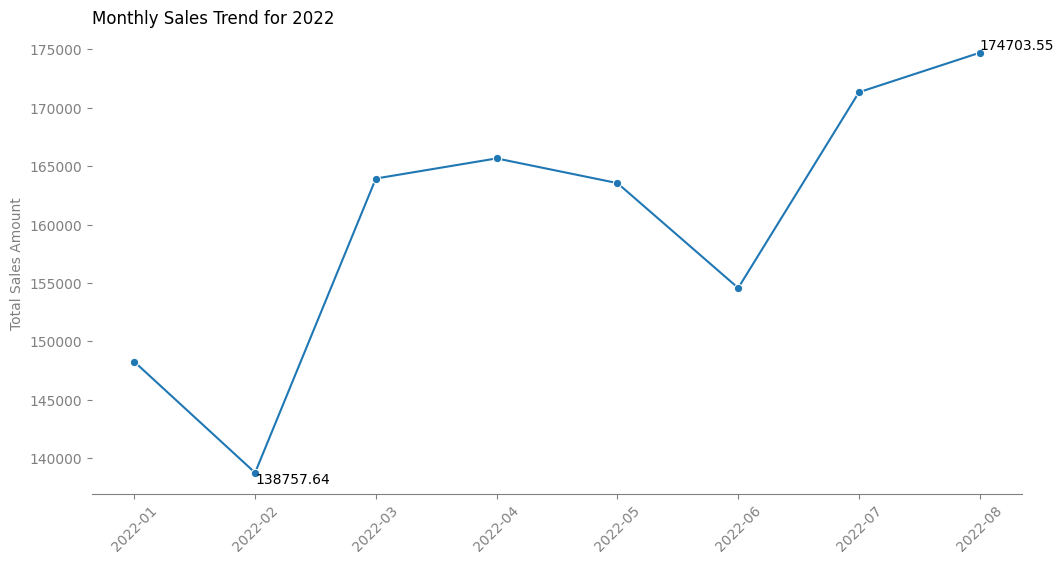

In [121]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalAmount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend for 2022', loc='left') # Remove. Add as subtitle to the presentation instead
plt.ylabel('Total Sales Amount', color='grey')
plt.xlabel(None)
plt.xticks(rotation=45)

sns.despine()
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color('grey')
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')

# for index, row in monthly_sales.iterrows():
#     plt.text(row['YearMonth'], row['TotalAmount'], f"${row['TotalAmount']:.2f}", ha='right', va='bottom')
# Annotate max and min points with total sales amount
max_sales = monthly_sales.loc[monthly_sales['TotalAmount'].idxmax()]
min_sales = monthly_sales.loc[monthly_sales['TotalAmount'].idxmin()]
plt.text(max_sales['YearMonth'], max_sales['TotalAmount'], max_sales['TotalAmount'], ha='left', va='bottom', fontsize=10)
plt.text(min_sales['YearMonth'], min_sales['TotalAmount'], min_sales['TotalAmount'], ha='left', va='top', fontsize=10)

plt.show()

In [137]:
df['Month'] = df['OrderDate'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
month_sales = df.groupby('Month', observed=False)['TotalAmount'].sum().reset_index()

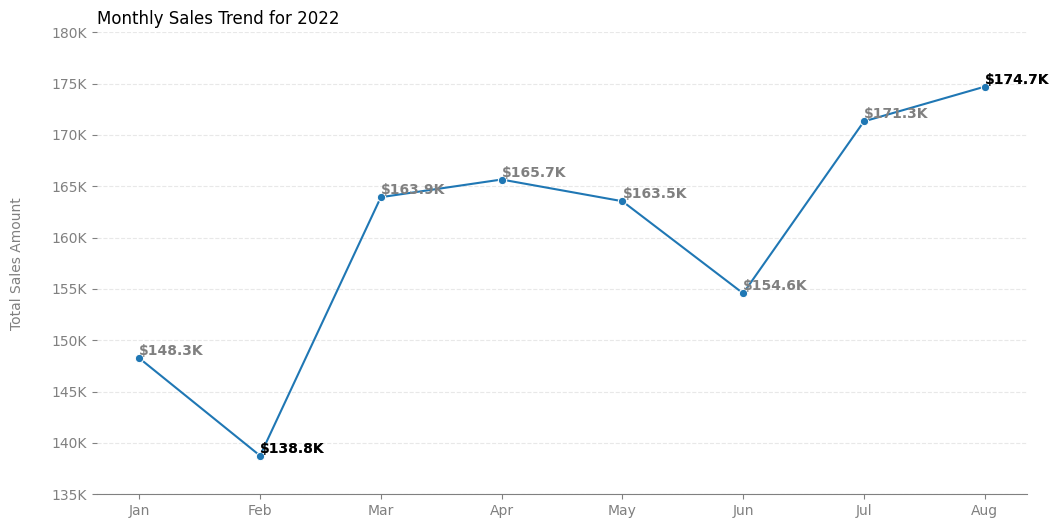

In [177]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='Month', y='TotalAmount', data=month_sales, marker='o')
plt.title('Monthly Sales Trend for 2022', loc='left') # Remove. Add as subtitle to the presentation instead
ylabels = ['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticks(g.get_yticks())
g.set_yticklabels(ylabels)
plt.ylabel('Total Sales Amount', color='grey', fontsize=10, labelpad=20)
plt.xlabel(None)

sns.despine()
plt.grid(axis='y', linestyle='--', color='lightgrey', alpha=0.5)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color('grey')
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')

for index, row in month_sales.iterrows():
     plt.text(row['Month'], row['TotalAmount'], f"${round(row['TotalAmount']/1000, 1)}K", ha='left', va='bottom', color='grey', fontweight='bold')
# Change text colour for max and min sales amount
max_s = month_sales.loc[month_sales['TotalAmount'].idxmax()]
min_s = month_sales.loc[month_sales['TotalAmount'].idxmin()]
plt.text(max_s['Month'], max_s['TotalAmount'], f"${round(max_s['TotalAmount']/1000, 1)}K", ha='left', va='bottom', fontsize=10, fontweight='bold')
plt.text(min_s['Month'], min_s['TotalAmount'], f"${round(min_s['TotalAmount']/1000, 1)}K", ha='left', va='bottom', fontsize=10, fontweight='bold')
plt.show()

**Observations and insights**

Although a comprehensive understanding of seasonal trends would require additional data, the trend observed here suggests that the business experiences fluctuations in demand throughout the year. 

Months like April, July, and August shows higher total sales amounts compared to other months, with February sales being the lowest.
[Holiday seasons, promotions](https://usapostline.com/en/articles/sales-calendar-in-usa-best-shopping-days), [product releases or special events](https://opas.com/blog/the-ultimate-us-sales-dates-cheat-sheet/) might play a role here and need to be explored further. 

In July most online stores offer Summer Clearance on casual clothes and shoes, electronics, home appliances, 40-50%. School supplies goes on offer with 25-65% off in August.

It would be helpful to see data for multiple years to account for year-to-year variations.

In [136]:
df['Weekday'] = df['OrderDate'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)
weekday_sales = df.groupby('Weekday', observed=False)['TotalAmount'].sum().reset_index()

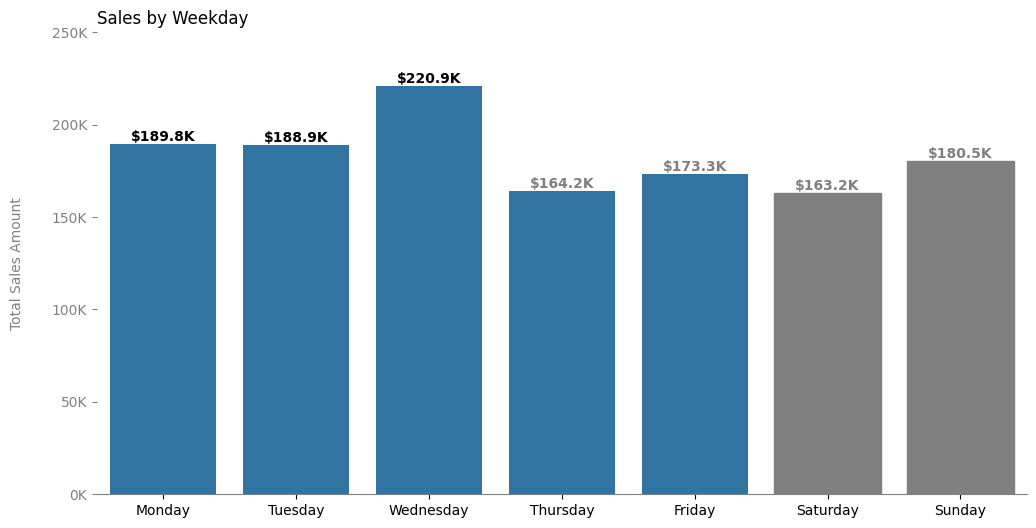

In [172]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='Weekday', y='TotalAmount', data=weekday_sales)
# Set gray for weekends
for index, bar in enumerate(g.patches):
    if weekday_sales.loc[index, 'Weekday'] in ['Saturday', 'Sunday']:
        bar.set_color('grey')

plt.title('Sales by Weekday', loc='left') # Remove. Add as subtitle to the presentation instead
ylabels = ['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticks(g.get_yticks())
g.set_yticklabels(ylabels)
plt.ylabel('Total Sales Amount', color='grey', fontsize=10, labelpad=20)
plt.xlabel(None)

# Change text colour for top 3 weekdays
weekday_sales_sorted = weekday_sales.sort_values(by='TotalAmount', ascending=False)
for index, row in weekday_sales.iterrows():
    text_color = 'black' if index < 3 else 'grey'
    plt.text(index, row['TotalAmount'], f"${round(row['TotalAmount']/1000, 1)}K", ha='center', va='bottom', color=text_color, fontweight='bold')

sns.despine()
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color('grey')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='grey')

plt.show()

**Observations and insights**

First three days of the working week seems to bring in more sales. This should be taken into account in planning company's staffing and marketing strategies.

## 3. Customer Segmentation Analysis

In [230]:
customer_sales = df[df['IsReturned'] != 1].groupby('CustomerID')['TotalAmount'].agg([('TotalAmount', 'sum'), ('UniqueOrders', 'count')])

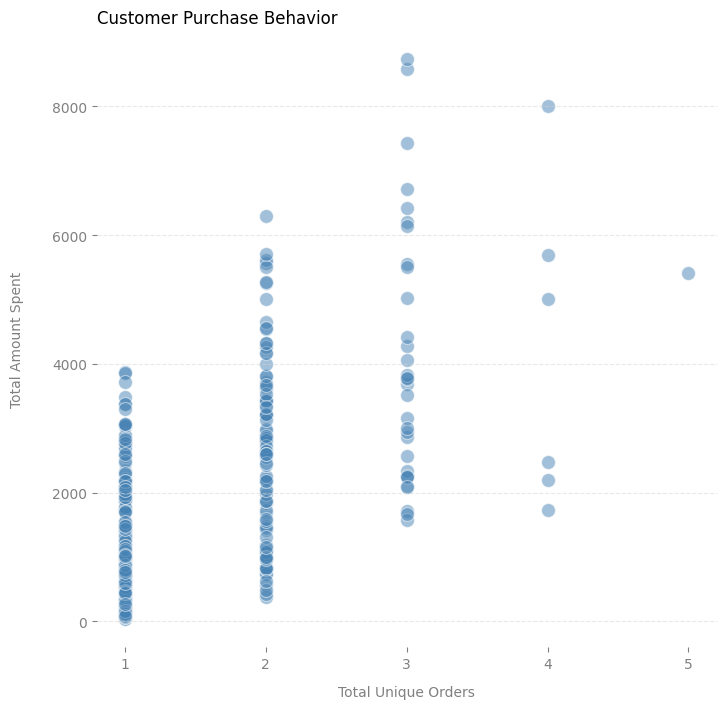

In [233]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='UniqueOrders', y='TotalAmount', data=customer_sales, color='steelblue', alpha=0.5, s=100)
plt.title('Customer Purchase Behavior', loc='left') # Remove. Add as subtitle to the presentation instead
plt.xlabel('Total Unique Orders', color='grey', fontsize=10, labelpad=10)
plt.ylabel('Total Amount Spent', color='grey', fontsize=10, labelpad=20)

sns.despine()
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(axis='y', linestyle='--', color='lightgrey', alpha=0.5)
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')
plt.xticks(range(1, max(customer_sales['UniqueOrders']) + 1))
plt.show()